In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import scienceplots
plt.style.use(['science', 'ieee', 'grid'])

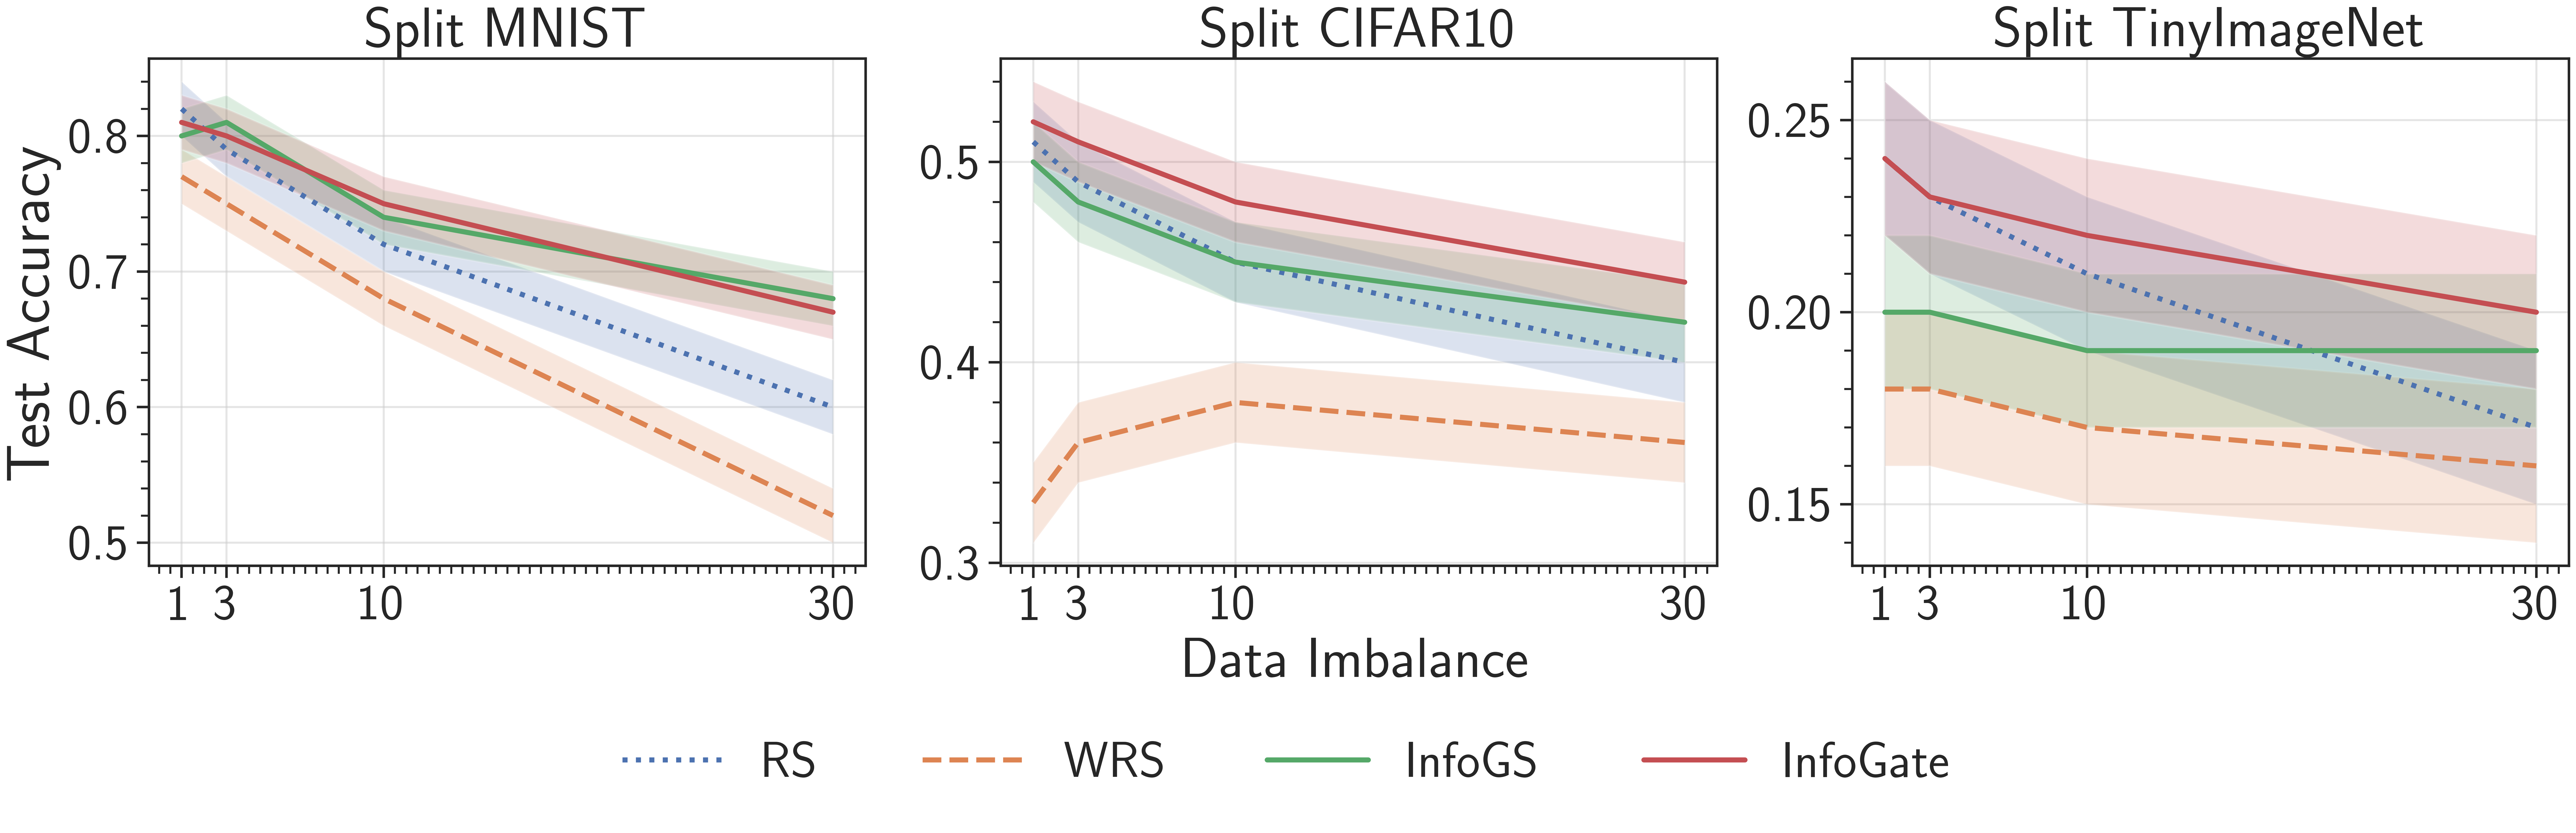

In [50]:
sns.set(style="ticks", font_scale=1.2)

x = [1, 3, 10, 30]
imbalance_levels = ['1', '3', '10', '30']

data = {
    'Split MNIST': {
        'RS': [0.82, 0.79, 0.72, 0.60],
        'WRS': [0.77, 0.75, 0.68, 0.52],
        'InfoGS': [0.80, 0.81, 0.74, 0.68],
        'InfoGate': [0.81, 0.80, 0.75, 0.67],
    },
    'Split CIFAR10': {
        'RS': [0.51, 0.49, 0.45, 0.40],
        'WRS': [0.33, 0.36, 0.38, 0.36],
        'InfoGS': [0.50, 0.48, 0.45, 0.42],
        'InfoGate': [0.52, 0.51, 0.48, 0.44],
    },
    'Split TinyImageNet': {
        'RS': [0.24, 0.23, 0.21, 0.17],
        'WRS': [0.18, 0.18, 0.17, 0.16],
        'InfoGS': [0.20, 0.20, 0.19, 0.19],
        'InfoGate': [0.24, 0.23, 0.22, 0.20],
    },
    'Split CIFAR10 (Buffer Size)': {
        'M=1600': [0.65, 0.63, 0.58, 0.46],
        'M=800': [0.61, 0.59, 0.53, 0.43],
        'M=400': [0.57, 0.55, 0.50, 0.38],
    }
}

legend_labels = []
legend_handles = []


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
palette = sns.color_palette("Set1", 3)

plt.rcParams['xtick.labelsize'] = 30 # X-axis tick size
plt.rcParams['ytick.labelsize'] = 30  # Y-axis tick size
plt.rcParams['axes.labelsize'] = 25  # Axes label size
plt.rcParams['axes.titlesize'] = 18  # Axes title size
plt.rcParams['legend.fontsize'] = 21  # Legend font size
plt.rcParams['figure.titlesize'] = 25  # Figure title size
plt.rcParams['axes.grid'] = True  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Grid line style
plt.rcParams['grid.linewidth'] = 0.5  # Grid line width
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)  #

#plt.rcParams['']

for ax, (title, series) in zip(axs, list(data.items())[:3]):
    for label, values in series.items():
        linestyle = '-' if 'Info' in label else '--' if 'WRS' in label else ':'
        ax.plot(x, values, label=label, linewidth=2.5, linestyle=linestyle)
        ax.fill_between(x, np.array(values) - 0.02, np.array(values) + 0.02, alpha=0.2)
    ax.set_title(title, fontsize=28)
    ax.set_xticks(x)
    ax.set_xticklabels(imbalance_levels, fontsize=25)
    
    if title == 'Split MNIST':
        ax.set_yticks([0.5, 0.6, 0.7, 0.8])
        ax.set_yticklabels(['0.5', '0.6', '0.7', '0.8'], fontsize=25)
    elif title == 'Split CIFAR10':
        ax.set_yticks([0.3, 0.4, 0.5])
        ax.set_yticklabels(['0.3', '0.4', '0.5'], fontsize=25)
    elif title == 'Split TinyImageNet':
        ax.set_yticks([0.15, 0.20, 0.25])
        ax.set_yticklabels(['0.15', '0.20', '0.25'], fontsize=25)

    if ax == axs[1]:
        ax.set_xlabel("Data Imbalance", fontsize=28)
    if ax == axs[0]:
        ax.set_ylabel("Test Accuracy", fontsize=30)
    ax.grid(True)

# Shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), frameon=False, fontsize=25)
plt.tight_layout(rect=[0, 0.15, 1, 1])
sns.set_style("ticks")
plt.savefig("imbalance_performance_plot.pdf", dpi=300)
plt.show()

Left: InfoGate handles imbalance better than uniform or weighted sampling, likely due to its confidence- and entropy-aware gating which selectively retains diverse and informative inputs.

Middle: Split CIFAR-10
- Starting accuracy is lower than MNIST (~0.5), reflecting higher task difficulty.
- WRS performs poorly throughout and stagnates near 0.35.
- RS and InfoGS decline similarly with imbalance.
- InfoGate maintains the best performance across all imbalance levels, especially when imbalance is high (30×).



📊 Right: Split TinyImageNet
This is the most challenging dataset — accuracies are lower overall.

WRS struggles the most and deteriorates below 0.16.

RS again degrades steadily with imbalance.

InfoGS flattens but stagnates around ~0.20.

InfoGate maintains a clear lead (~0.24 → 0.20), with a more stable trend than others.

✅ Conclusion: InfoGate consistently outperforms others in extreme data imbalance settings, especially in low-data regimes, likely due to its selective admission of representative, low-entropy inputs.

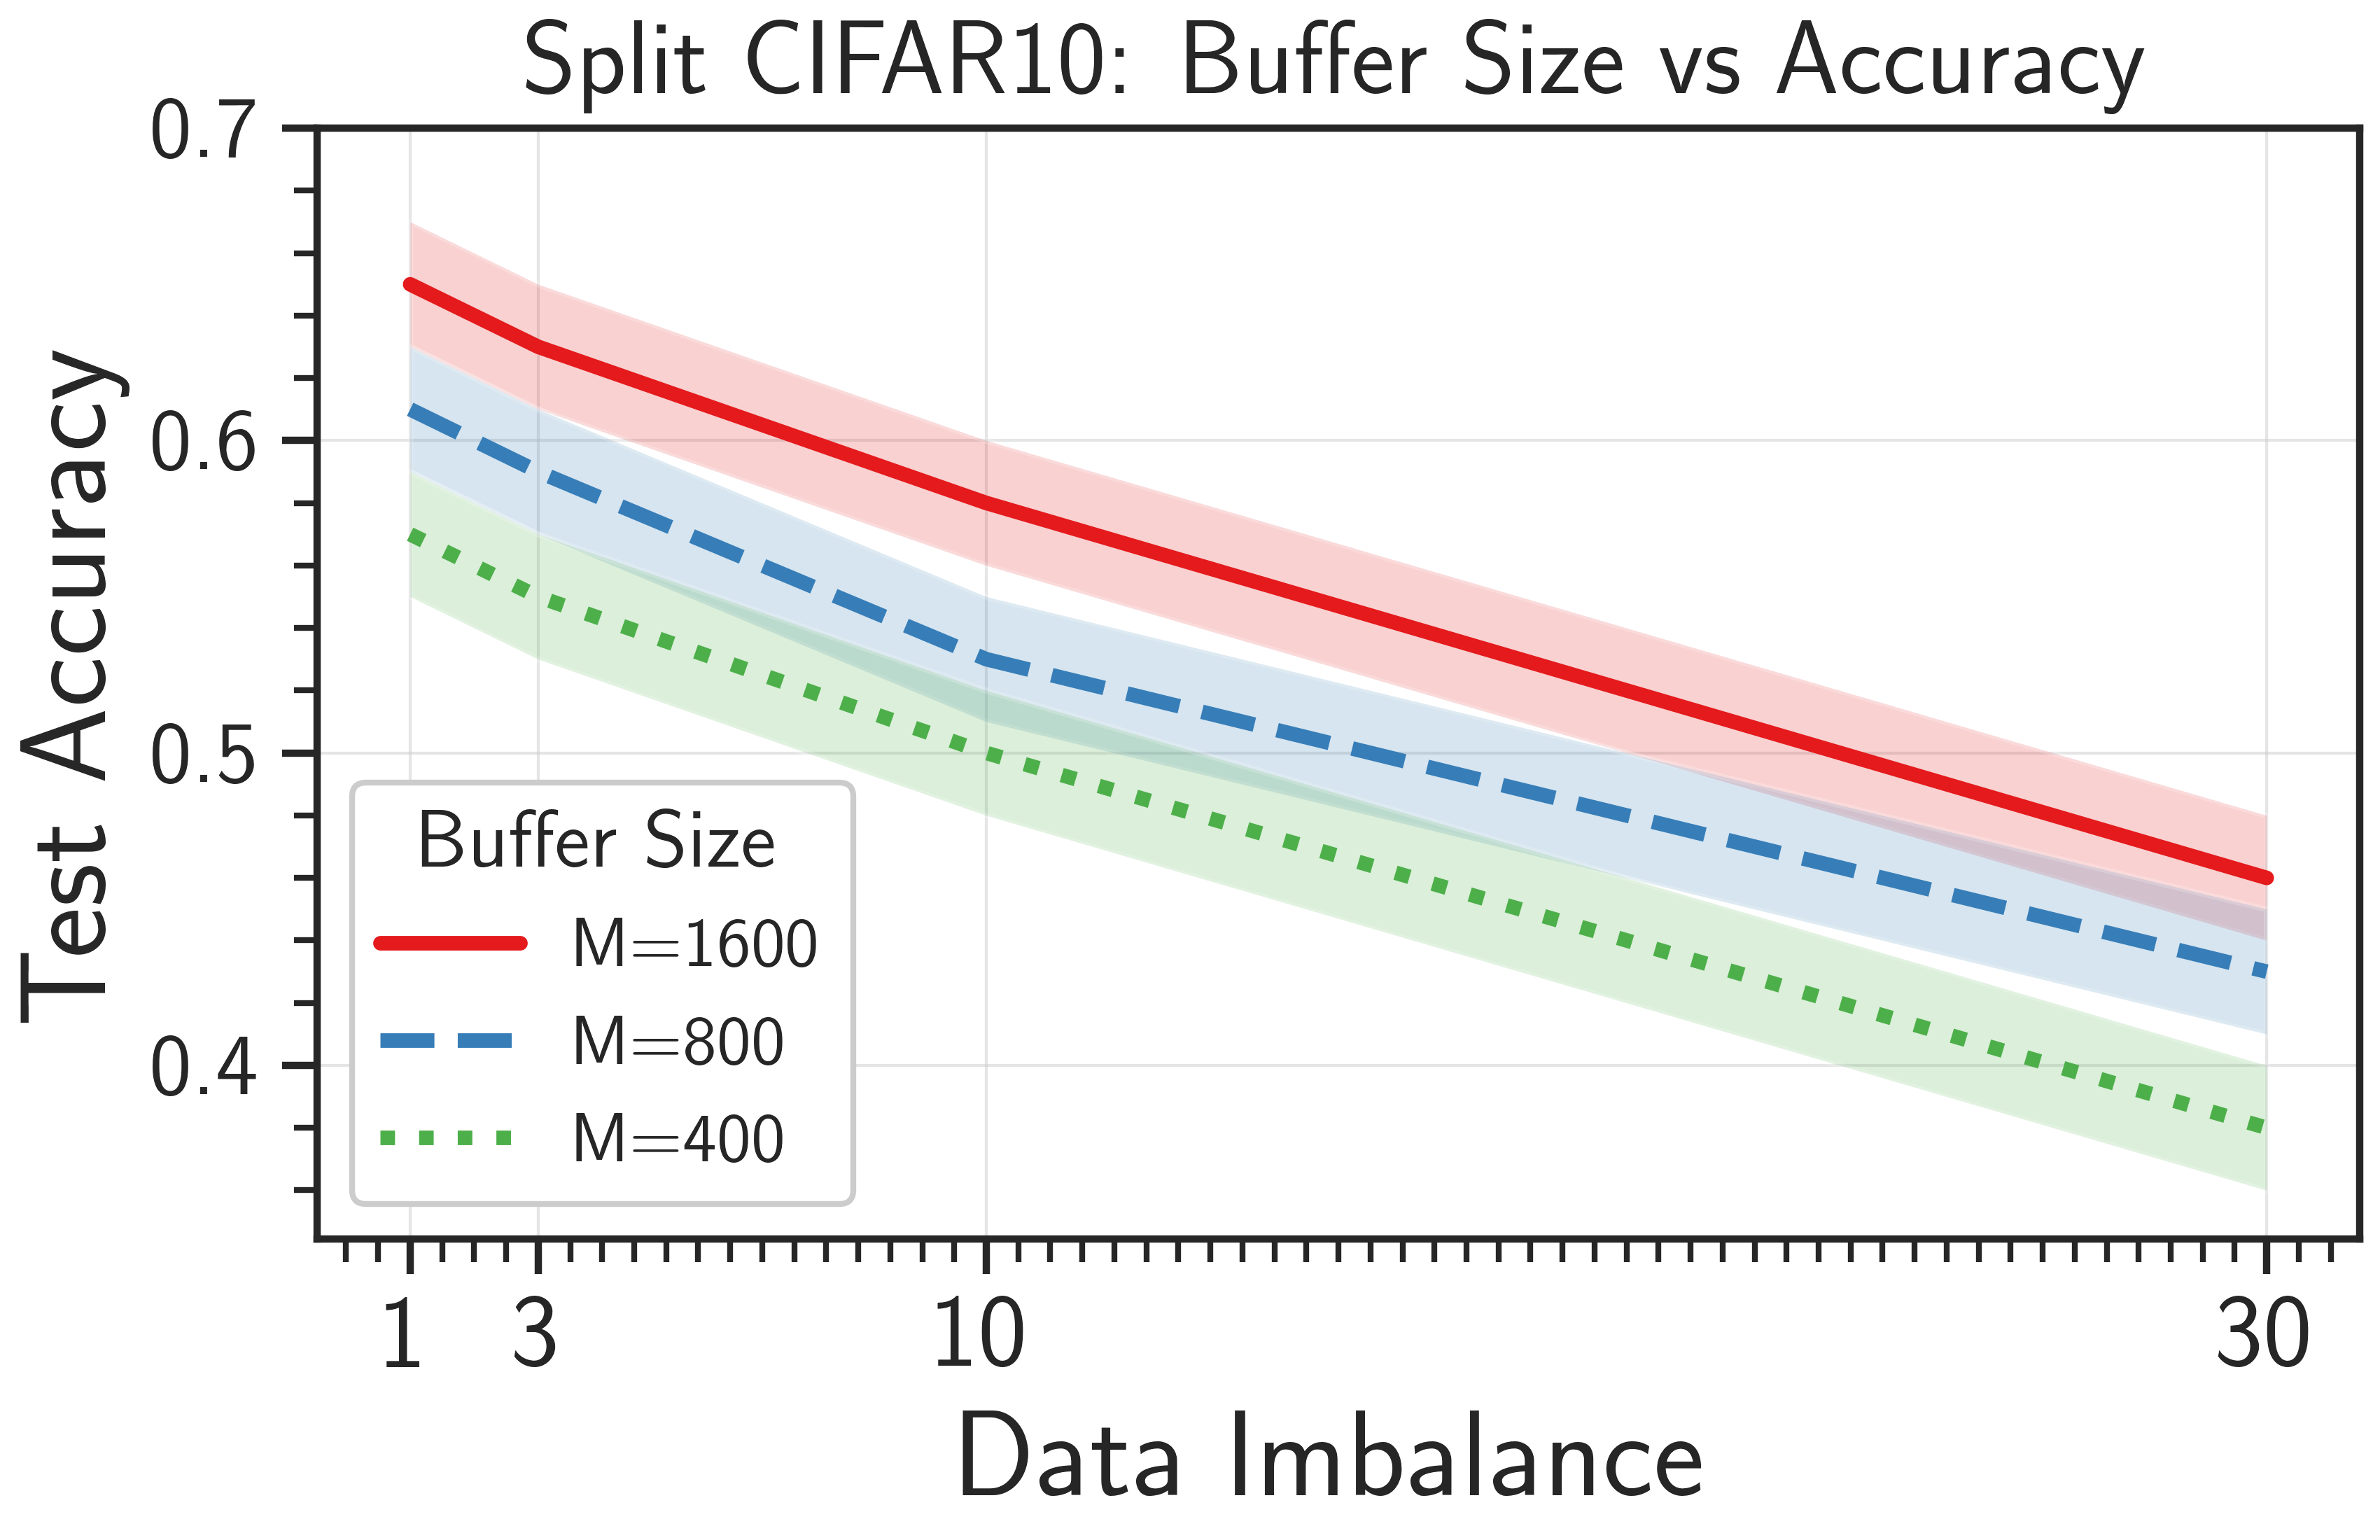

In [14]:
# Plot 2: Memory Buffer Size Performance

fig, ax = plt.subplots(figsize=(6, 4))

plt.rcParams['xtick.labelsize'] = 15 # X-axis tick size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick size
plt.rcParams['axes.labelsize'] = 15  # Axes label size
plt.rcParams['axes.titlesize'] = 18  # Axes title size
plt.rcParams['legend.fontsize'] = 18  # Legend font size
plt.rcParams['figure.titlesize'] = 21  # Figure title size
plt.rcParams['axes.grid'] = True  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Grid line style
plt.rcParams['grid.linewidth'] = 0.5  # Grid line width
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)  #

series = data['Split CIFAR10 (Buffer Size)']
palette = sns.color_palette("Set2", 3)

for label, values in series.items():
    linestyle = '-' if '1600' in label else '--' if '800' in label else ':'
    ax.plot(x, values, label=label, linewidth=2.5, linestyle=linestyle)
    ax.fill_between(x, np.array(values) - 0.02, np.array(values) + 0.02, alpha=0.2)

ax.set_title("Split CIFAR10: Buffer Size vs Accuracy", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(imbalance_levels, fontsize=18)
ax.set_yticks([0.4, 0.5, 0.6, 0.7])
ax.set_yticklabels(['0.4', '0.5', '0.6', '0.7'], fontsize=15)
ax.set_xlabel("Data Imbalance", fontsize=21)
ax.set_ylabel("Test Accuracy", fontsize=21)
ax.grid(True)
ax.legend(title='Buffer Size', loc='lower left', fontsize=12, title_fontsize=14)

sns.set_style("ticks")
plt.tight_layout()
plt.savefig("memory_size_comparison_plot.pdf", dpi=300)
plt.show()


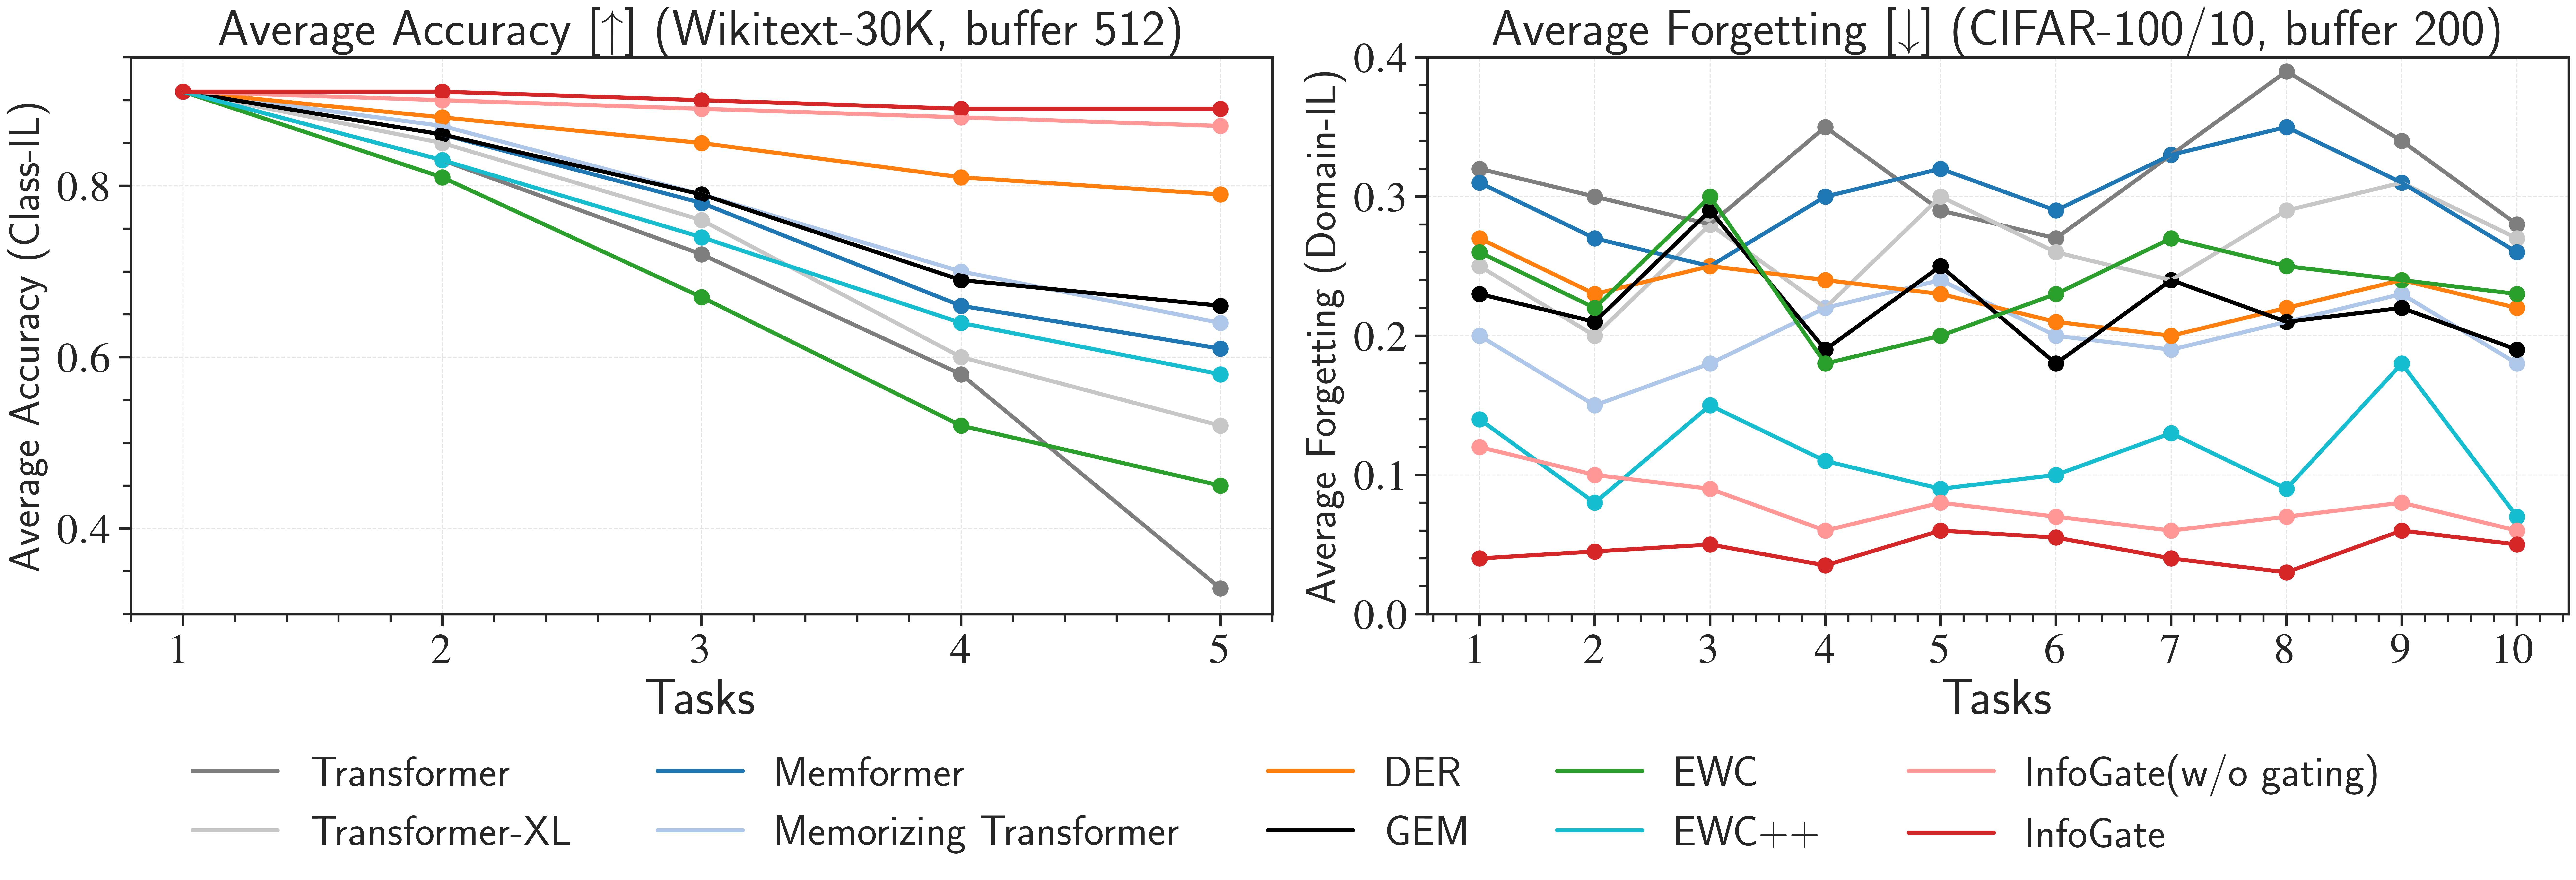

In [44]:
sns.set(style="ticks", font_scale=1.2)

tasks = np.arange(1, 6)
models = [
    "Transformer", "Transformer-XL", "Memformer", "Memorizing Transformer",
    "DER", "GEM", "EWC", "EWC++", "InfoGate(w/o gating)", "InfoGate"
]

acc_data = {
    "Transformer": [0.91, 0.83, 0.72, 0.58, 0.33],
    "Transformer-XL": [0.91, 0.85, 0.76, 0.60, 0.52],
    "Memformer": [0.91, 0.86, 0.78, 0.66, 0.61],
    "Memorizing Transformer": [0.91, 0.87, 0.79, 0.70, 0.64],
    "DER": [0.91, 0.88, 0.85, 0.81, 0.79],
    "GEM": [0.91, 0.86, 0.79, 0.69, 0.66],
    "EWC": [0.91, 0.81, 0.67, 0.52, 0.45],
    "EWC++": [0.91, 0.83, 0.74, 0.64, 0.58],
    "InfoGate(w/o gating)": [0.91, 0.90, 0.89, 0.88, 0.87],
    "InfoGate": [0.91, 0.91, 0.90, 0.89, 0.89]
}

forget_data = {
    "Transformer": [0.32, 0.30, 0.28, 0.35, 0.29, 0.27, 0.33, 0.39, 0.34, 0.28],
    "Transformer-XL": [0.25, 0.20, 0.28, 0.22, 0.30, 0.26, 0.24, 0.29, 0.31, 0.27],
    "Memformer": [0.31, 0.27, 0.25, 0.30, 0.32, 0.29, 0.33, 0.35, 0.31, 0.26],
    "Memorizing Transformer": [0.20, 0.15, 0.18, 0.22, 0.24, 0.20, 0.19, 0.21, 0.23, 0.18],
    "DER": [0.27, 0.23, 0.25, 0.24, 0.23, 0.21, 0.20, 0.22, 0.24, 0.22],
    "GEM": [0.23, 0.21, 0.29, 0.19, 0.25, 0.18, 0.24, 0.21, 0.22, 0.19],
    "EWC": [0.26, 0.22, 0.30, 0.18, 0.20, 0.23, 0.27, 0.25, 0.24, 0.23],
    "EWC++": [0.14, 0.08, 0.15, 0.11, 0.09, 0.10, 0.13, 0.09, 0.18, 0.07],
    "InfoGate(w/o gating)": [0.12, 0.10, 0.09, 0.06, 0.08, 0.07, 0.06, 0.07, 0.08, 0.06],
    "InfoGate": [0.04, 0.045, 0.05, 0.035, 0.06, 0.055, 0.04, 0.03, 0.06, 0.05]
}

custom_colors = {
    "InfoGate": "#d62728",             # bold red
    "InfoGate(w/o gating)": "#ff9896",# light red
    "Memformer": "#1f77b4",        # blue
    "Memorizing Transformer": "#aec7e8",
    "Transformer": "#7f7f7f",      # gray
    "Transformer-XL": "#c7c7c7",
    "EWC": "#bcbd22",              # yellow green
    "GEM": "#000000",              # black
    "DER": "#ff7f0e",              # orange
    "EWC++": "#17becf",             # cyan
    "EWC": "#2ca02c",              # green
}

plt.rcParams['xtick.labelsize'] = 21  # X-axis tick size
plt.rcParams['ytick.labelsize'] = 21  # Y-axis tick size
plt.rcParams['axes.labelsize'] = 25  # Axes label size
plt.rcParams['axes.titlesize'] = 25  # Axes title size
plt.rcParams['legend.fontsize'] = 21  # Legend font size
plt.rcParams['figure.titlesize'] = 25  # Figure title size
plt.rcParams['axes.grid'] = True  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Grid line style
plt.rcParams['grid.linewidth'] = 0.5  # Grid line width
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)  #

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
palette = sns.color_palette("Set2", 4)

# Accuracy plot
for model, acc in acc_data.items():
    axes[0].plot(tasks, acc, linestyle = '-', color=custom_colors.get(model, 'red'), linewidth=2)
    axes[0].scatter(tasks, acc, linestyle = '-', color=custom_colors.get(model, 'red'), linewidth=2)

axes[0].set_title("Average Accuracy [↑] (Wikitext-30K, buffer 512)", fontsize=25)
axes[0].set_xlabel("Tasks", fontsize=25)
axes[0].set_ylabel("Average Accuracy (Class-IL)", fontsize=21)
axes[0].set_ylim(0.30, 0.95)
axes[0].set_xticks(tasks)
#axes[0].set_xticklabels(tasks, fontsize=15)
axes[0].grid(True)

# Forgetting plot
task_idx = np.arange(1, 11)
for model, forget in forget_data.items():
    axes[1].plot(task_idx, forget, linestyle = '-', label=model, color=custom_colors.get(model, 'red'), linewidth=2)
    axes[1].scatter(task_idx, forget, linestyle = '-', color=custom_colors.get(model, 'red'), linewidth=2)

axes[1].set_title("Average Forgetting [↓] (CIFAR-100/10, buffer 200)", fontsize=25)
axes[1].set_xlabel("Tasks", fontsize=25)
axes[1].set_ylabel("Average Forgetting (Domain-IL)", fontsize=21)
axes[1].set_ylim(0, 0.40)
axes[1].set_xticks(task_idx)
#axes[1].set_xticklabels(task_idx, fontsize=15)
axes[1].grid(True)

# Combined legend at bottom
fig.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05), fontsize=21, frameon=False)

plt.tight_layout(rect=[0, 0.2, 1, 1])
plt.subplots_adjust(bottom=0.27)
sns.set_style("ticks",)
plt.savefig("cl_comparison_methods.pdf", dpi=300)
plt.show()

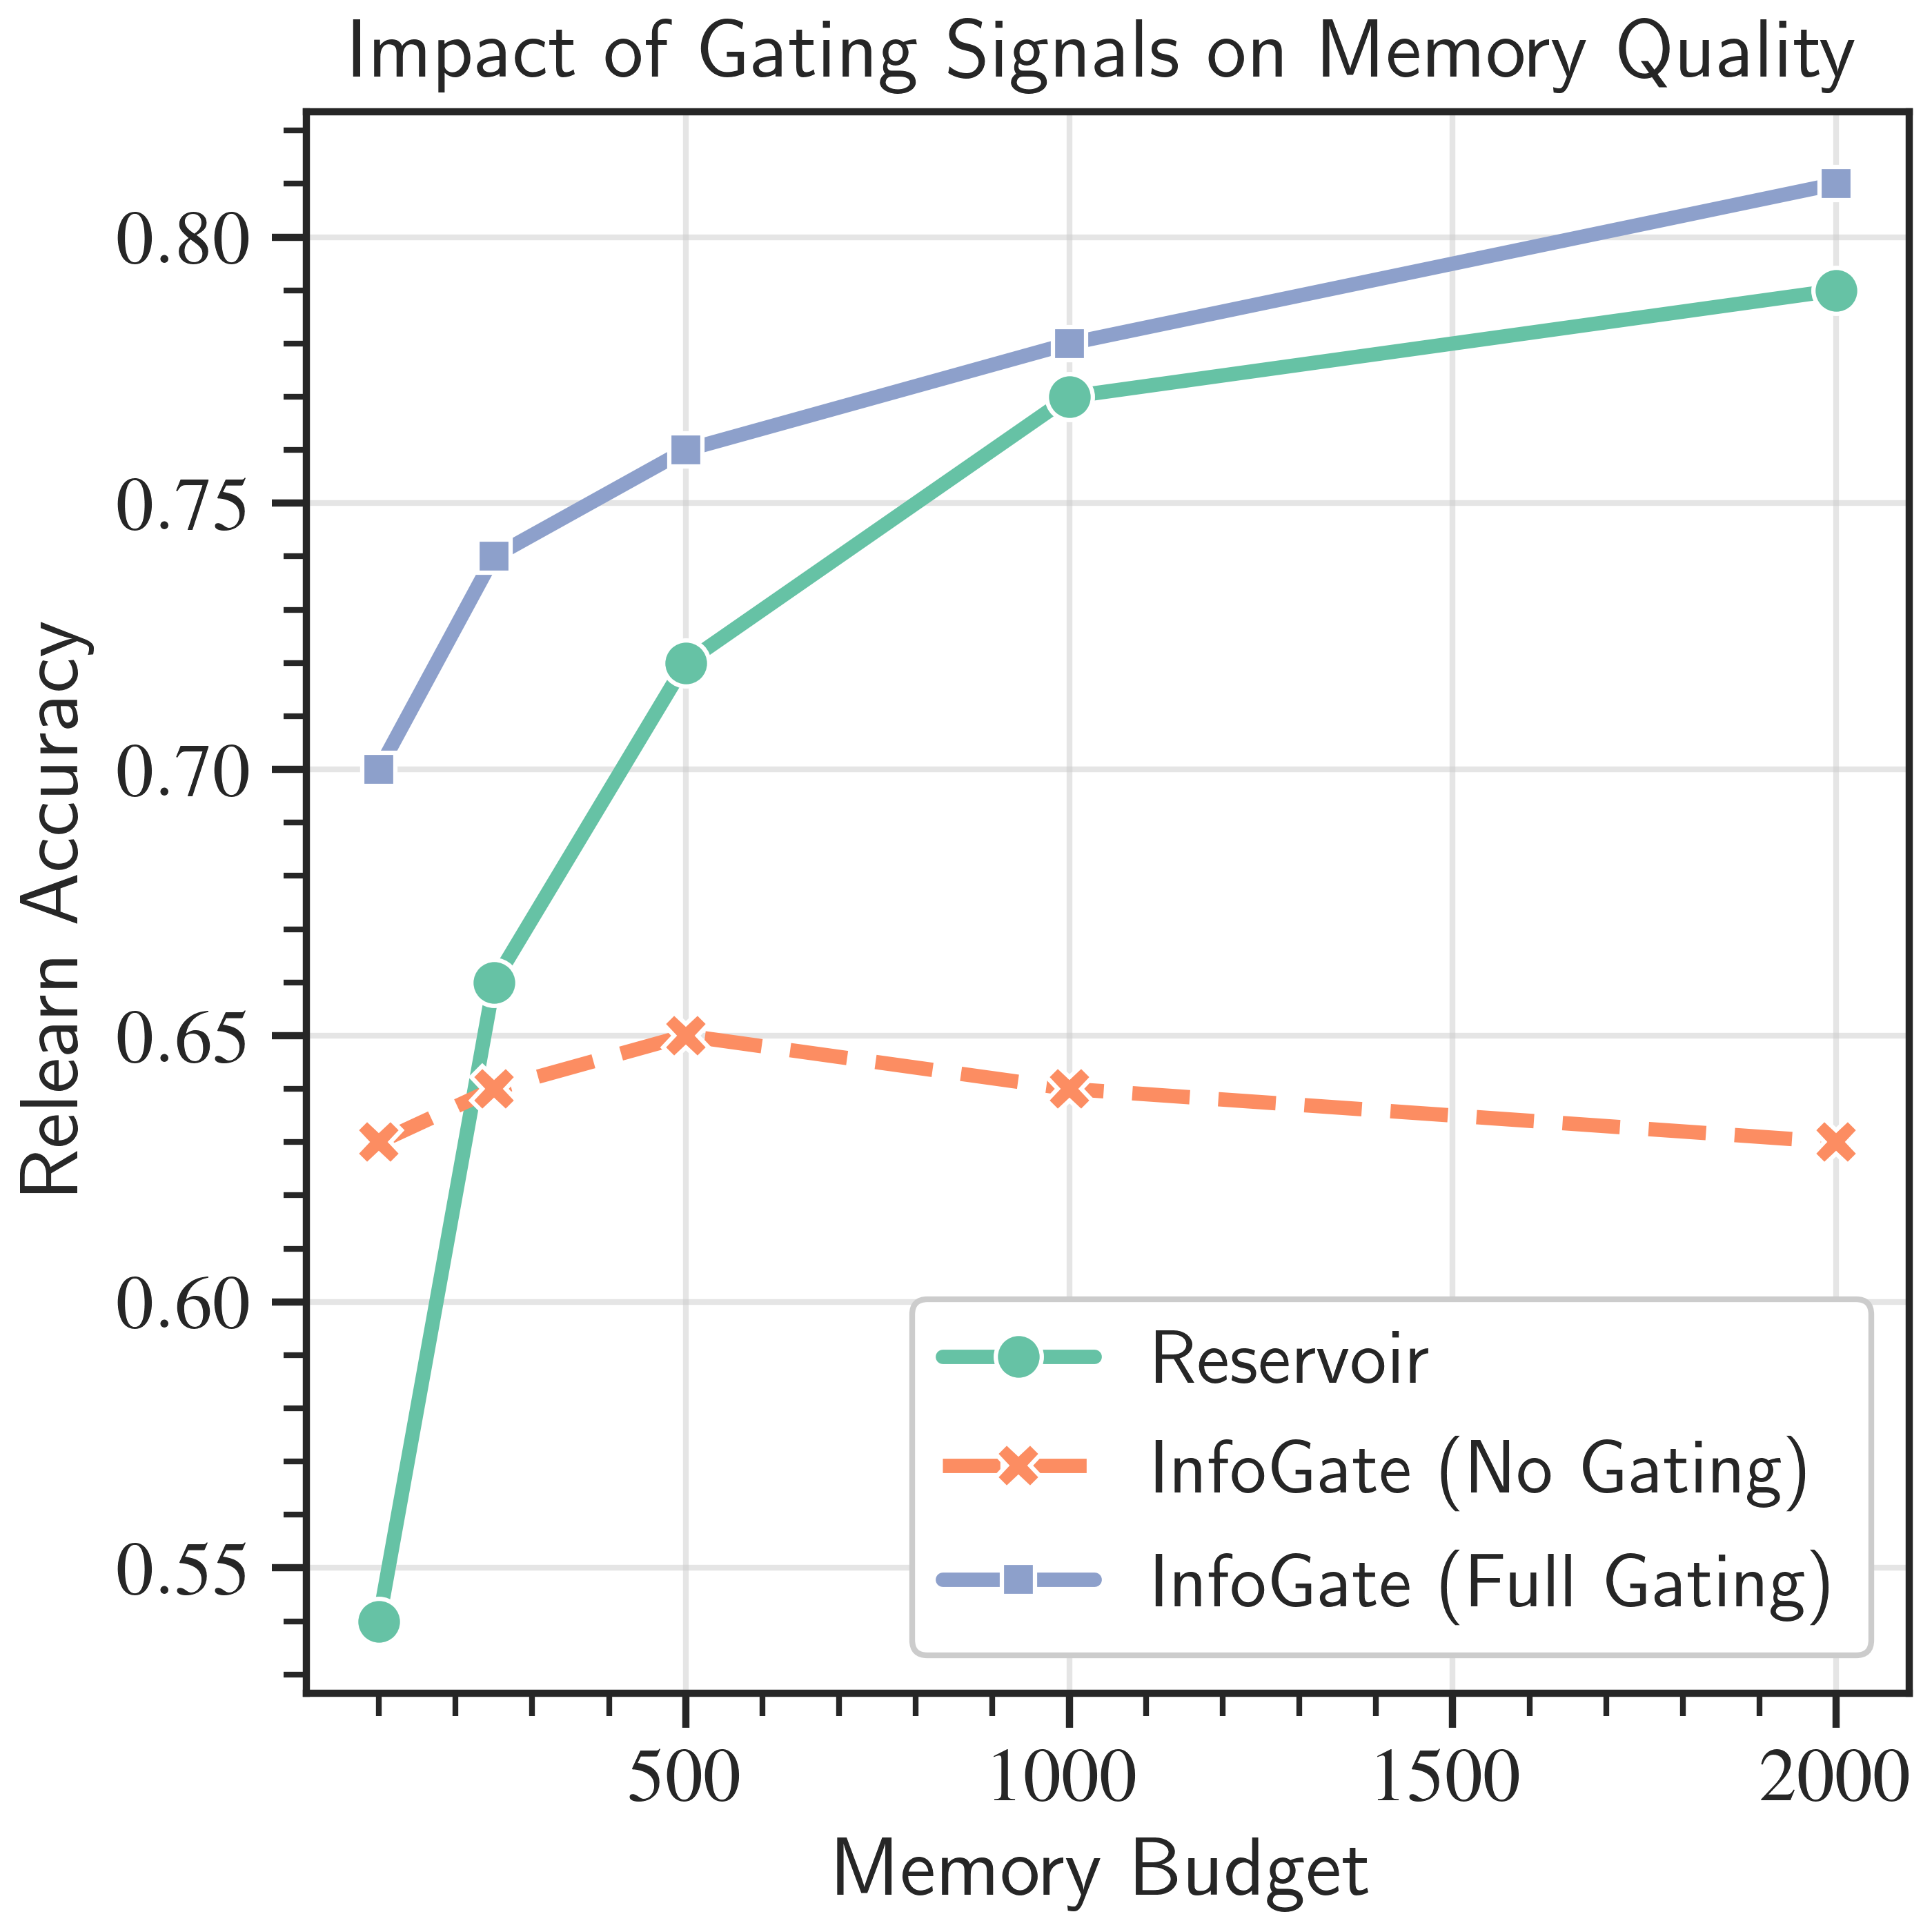

In [39]:
# Use Seaborn style and palette
sns.set(style="ticks", font_scale=1.2)
palette = sns.color_palette("Set2", 3)

# Replace with actual results
data = {
    'Budget': [100, 250, 500, 1000, 2000] * 3,
    'Accuracy': [
        0.54, 0.66, 0.72, 0.77, 0.79,   # Reservoir
        0.63, 0.64, 0.65, 0.64, 0.63,   # InfoGate without gating
        0.70, 0.74, 0.76, 0.78, 0.81    # InfoGate with gating
    ],
    'Method': (
        ['Reservoir'] * 5 +
        ['InfoGate (No Gating)'] * 5 +
        ['InfoGate (Full Gating)'] * 5
    )
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(5, 5))
sns.lineplot(
    data=df, x='Budget', y='Accuracy', hue='Method', style='Method',
    markers=True, dashes={'InfoGate (No Gating)': (4, 2), 'InfoGate (Full Gating)': '', 'Reservoir': ''},
    palette=palette, linewidth=2.5, markersize=8
)

plt.xlabel('Memory Budget')
plt.ylabel('Relearn Accuracy')
plt.title('Impact of Gating Signals on Memory Quality')
plt.grid(True)
plt.tight_layout()
plt.legend(title='', loc='lower right')
plt.savefig("memory_quality_gating_signals.pdf", dpi=300, bbox_inches='tight')
plt.show()

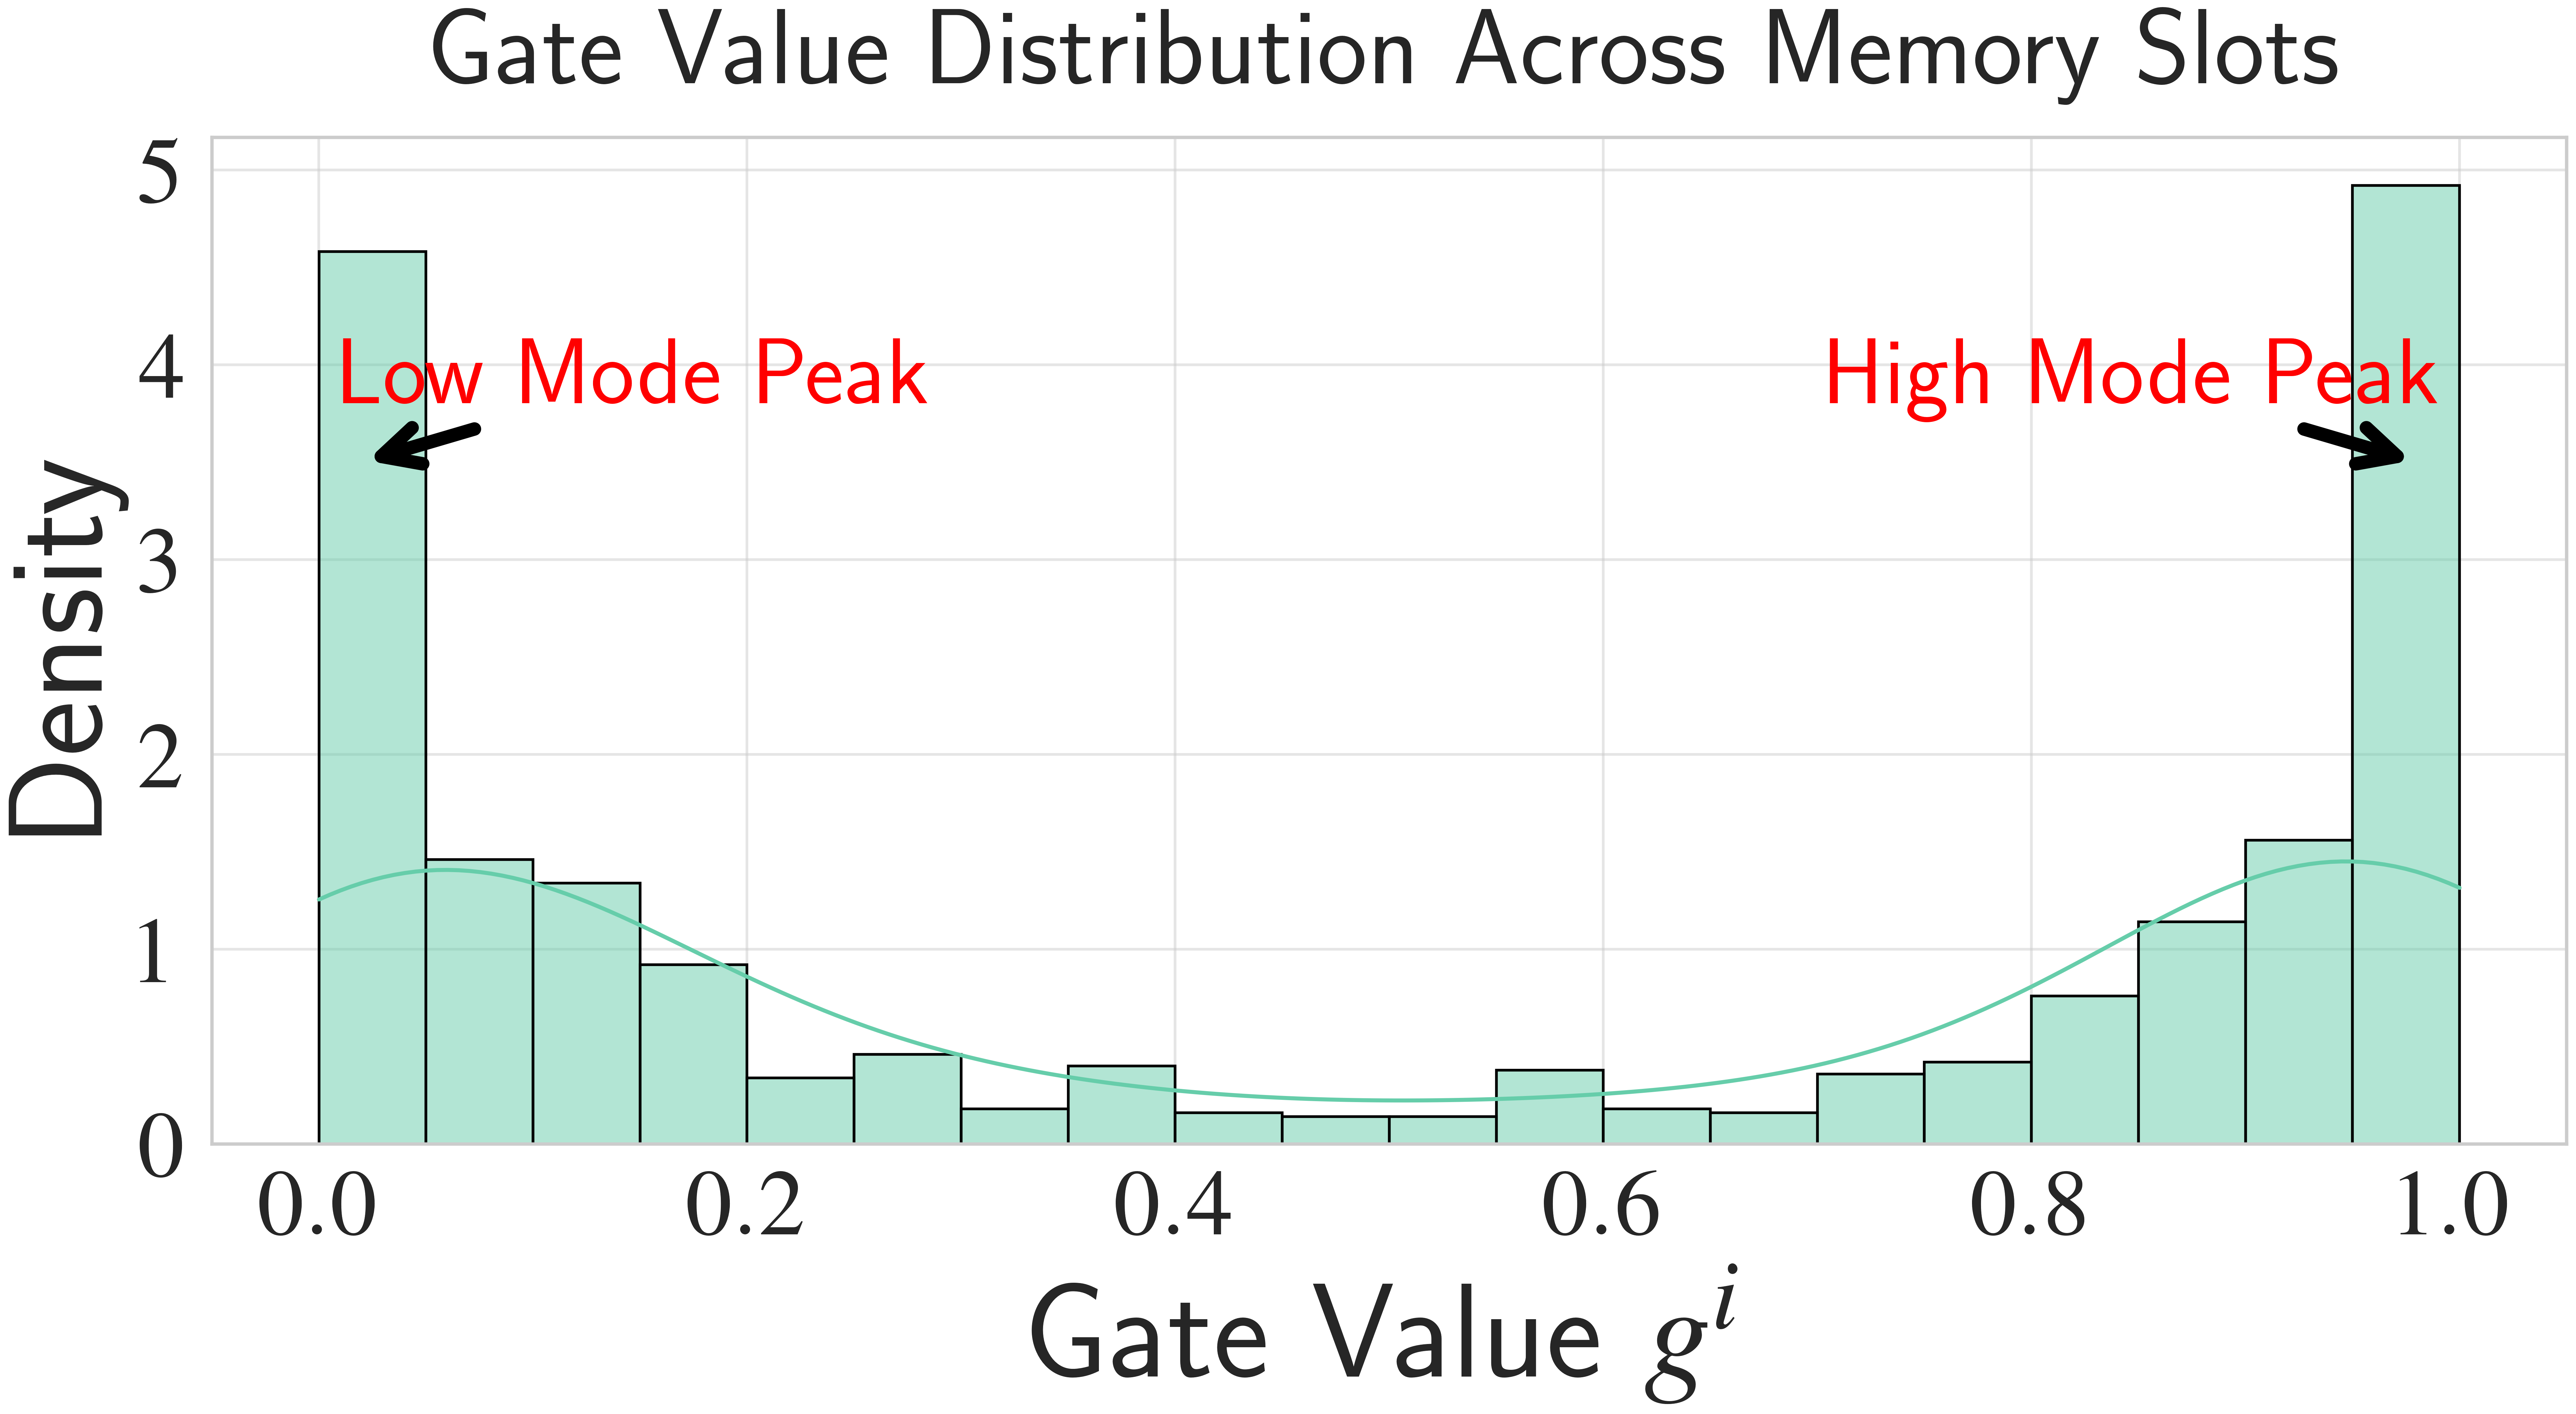

In [53]:
# Generate bimodal gate values
np.random.seed(42)
low_mode = np.random.beta(0.5, 4, 500)
high_mode = np.random.beta(4, 0.5, 500)
gate_values = np.clip(np.concatenate([low_mode, high_mode]), 0, 1)

# Plot settings
sns.set(style="whitegrid", font_scale=2.2)
plt.figure(figsize=(14, 8))

# Histogram with KDE
sns.histplot(gate_values, bins=20, kde=True, stat='density', color='mediumaquamarine', edgecolor='black')

# Labels and Title
plt.xlabel(r'Gate Value $g^i$', fontsize=50)
plt.ylabel("Density", fontsize=50)
plt.title("Gate Value Distribution Across Memory Slots", fontsize=40, pad=20)

# Arrows and Annotations
arrow_props = dict(arrowstyle='->', color='black', linewidth=5)
plt.annotate("Low Mode Peak", xy=(0.02, 3.5), xytext=(0.15, 3.8),
             arrowprops=arrow_props, fontsize=35, color='red', ha='center')
plt.annotate("High Mode Peak", xy=(0.98, 3.5), xytext=(0.85, 3.8),
             arrowprops=arrow_props, fontsize=35, color='red', ha='center')

# Tight layout
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.tight_layout()
plt.savefig("gate_value_distribution.pdf", dpi=300)
plt.show()